In [1]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt 
import matplotlib.ticker as mtick
from matplotlib import patheffects
from typing import Callable
from scipy.stats import skew, kurtosis
np.set_printoptions(suppress=True)

from performance import performance
from backtest import backtest
from strategy import strategy

plt.rcParams["figure.figsize"] = (30,5)

In [2]:
ff = pd.read_csv('Data/F-F_Research_Data_5_Factors_2x3_daily.csv', skiprows=3, delimiter=',')
ff.rename(columns = {'Unnamed: 0' : 'Date'}, inplace = True)
ff['Date'] = pd.to_datetime(ff['Date'], format = '%Y%M%d').dt.strftime('%Y-%M-%d')
ff['Date'] = pd.to_datetime(ff['Date'])
ff = ff.set_index(['Date'])

# load value weighted industry returns and rename col
value_weighted_ind_rtns = pd.read_csv('Data/49_Industry_Portfolios_Daily.csv',
                                      skiprows=9, skipfooter = 25714, delimiter=',')

value_weighted_ind_rtns = value_weighted_ind_rtns[(value_weighted_ind_rtns > -99)].dropna()

value_weighted_ind_rtns = value_weighted_ind_rtns.add_prefix('value_wgted_')

value_weighted_ind_rtns.rename(columns = {'value_wgted_Unnamed: 0' : 'Date'}, inplace = True)
value_weighted_ind_rtns['Date'] = pd.to_datetime(value_weighted_ind_rtns['Date'], format = '%Y%M%d').dt.strftime('%Y-%M-%d')
value_weighted_ind_rtns['Date'] = pd.to_datetime(value_weighted_ind_rtns['Date'])
value_weighted_ind_rtns = value_weighted_ind_rtns.set_index(['Date'])

spot = pd.concat([value_weighted_ind_rtns, ff], axis=1, join="inner")

spot_ret = spot / 100
spot = (spot_ret.drop(columns = 'RF') + 1).cumprod(axis=0)
benchmark_ret = (spot_ret['Mkt-RF'] + spot_ret['RF']).to_frame().rename(columns = {0 : 'Mkt'})

C:\Users\Edmund\AppData\Local\Temp\ipykernel_13336\3532147485.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  value_weighted_ind_rtns = pd.read_csv('Data/49_Industry_Portfolios_Daily.csv',


### BASE PARAMS

In [3]:
start_date = '1970-01-01' #'1969-07-01'
end_date = '2024-03-01'
rebal_freq = 'MS'
slippage = 0.005
leverage = 1
max_short_weight = 1
downside_risk = 0
benchmark_weights = np.array([1])
metrics = ['Annualized Return', 'Sharpe Ratio', 'Information Ratio', 'Sortino Ratio', 'Max Drawdown', 'Volatility']

params = {
    'start_date': start_date, 
    'end_date': end_date, 
    'rebal_freq': rebal_freq,
    'spot' : spot, 
    'spot_ret': spot_ret, 
    'benchmark_ret': benchmark_ret, 
    'weights': {}, 
    'benchmark_weights': benchmark_weights, 
    'slippage': slippage, 
    'leverage': leverage, 
    'max_short_weight': max_short_weight,
    'downside_risk': downside_risk,
    'metrics': metrics,
    'charts': False
          }

### Monthly Rebal

In [4]:
strat = strategy(**params)

##################
# Period Returns #
##################
################################################################
print('MS_trailing_ret_EW')
# Generate weights based on strategy
generated_weights = strat.trailing_rets(lookback = -61, weighting = 'EQUAL')
# Update parameters
params['weights'] = generated_weights
# Run Backtest
MS_trailing_ret_EW = copy.deepcopy(backtest(**params))
final_port = MS_trailing_ret_EW.run()

################################################################
print('opt_MS_trailing_ret_EW')
# Generate weights based on strategy
generated_weights = strat.trailing_rets(lookback = -40, weighting = 'EQUAL') # (0.4937509057241768, 40)
# Update parameters
params['weights'] = generated_weights
# Run Backtest
opt_MS_trailing_ret_EW = copy.deepcopy(backtest(**params))
final_port = opt_MS_trailing_ret_EW.run()

################################################################
print('MS_trailing_ret_RANK')
# Generate weights based on strategy
generated_weights = strat.trailing_rets(lookback = -61, weighting = 'RANKED')
# Update parameters
params['weights'] = generated_weights
# Run Backtest
MS_trailing_ret_RANK = copy.deepcopy(backtest(**params))
final_port = MS_trailing_ret_RANK.run()

################################################################
print('opt_MS_trailing_ret_RANK')
# Generate weights based on strategy
generated_weights = strat.trailing_rets(lookback = -40, weighting = 'RANKED') # (0.5204419933982771, 40)
# Update parameters
params['weights'] = generated_weights
# Run Backtest
opt_MS_trailing_ret_RANK = copy.deepcopy(backtest(**params))
final_port = opt_MS_trailing_ret_RANK.run()

################################################################
print('MS_trailing_ret_VOL_TARGET')
# Generate weights based on strategy
generated_weights = strat.trailing_rets(lookback = -61, weighting = 'VOL_TARGET', vol_target = 0.20)
# Update parameters
params['weights'] = generated_weights
# Run Backtest
MS_trailing_ret_VOL_TARGET = copy.deepcopy(backtest(**params))
final_port = MS_trailing_ret_VOL_TARGET.run()

################################################################
print('opt_MS_trailing_ret_VOL_TARGET')
# Generate weights based on strategy
generated_weights = strat.trailing_rets(lookback = -40, weighting = 'VOL_TARGET', vol_target = 0.20) # (0.5096868207068673, 40)
# Update parameters
params['weights'] = generated_weights
# Run Backtest
opt_MS_trailing_ret_VOL_TARGET = copy.deepcopy(backtest(**params))
final_port = opt_MS_trailing_ret_VOL_TARGET.run()

##################
# Moving Average #
##################
################################################################
print('MS_ma_EW')
# Generate weights based on strategy
generated_weights = strat.moving_avg_crossover(7, 21, weighting = 'EQUAL')
# Update parameters
params['weights'] = generated_weights
# Run Backtest
MS_ma_EW = copy.deepcopy(backtest(**params))
final_port = MS_ma_EW.run()

################################################################
print('opt_MS_ma_EW')
# Generate weights based on strategy
generated_weights = strat.moving_avg_crossover(5, 25, weighting = 'EQUAL') # (0.4458417196683036, [5, 25])
# Update parameters
params['weights'] = generated_weights
# Run Backtest
opt_MS_ma_EW = copy.deepcopy(backtest(**params))
final_port = opt_MS_ma_EW.run()

################################################################
print('MS_ma_RANK')
# Generate weights based on strategy
generated_weights = strat.moving_avg_crossover(7, 21, weighting = 'RANKED')
# Update parameters
params['weights'] = generated_weights
# Run Backtest
MS_ma_RANK = copy.deepcopy(backtest(**params))
final_port = MS_ma_RANK.run()

################################################################
print('opt_MS_ma_RANK')
# Generate weights based on strategy
generated_weights = strat.moving_avg_crossover(190, 195, weighting = 'RANKED') # (0.4580166963851516, [190, 195])
# Update parameters
params['weights'] = generated_weights
# Run Backtest
opt_MS_ma_RANK = copy.deepcopy(backtest(**params))
final_port = opt_MS_ma_RANK.run()

################################################################
print('MS_ma_VOL_TARGET')
# Generate weights based on strategy
generated_weights = strat.moving_avg_crossover(7, 21, weighting = 'VOL_TARGET', vol_target = 0.20)
# Update parameters
params['weights'] = generated_weights
# Run Backtest
MS_ma_VOL_TARGET = copy.deepcopy(backtest(**params))
final_port = MS_ma_VOL_TARGET.run()

################################################################
print('opt_MS_ma_VOL_TARGET')
# Generate weights based on strategy
generated_weights = strat.moving_avg_crossover(5, 155, weighting = 'VOL_TARGET', vol_target = 0.20) # (0.4171660896868207, [5, 155])
# Update parameters
params['weights'] = generated_weights
# Run Backtest
opt_MS_ma_VOL_TARGET = copy.deepcopy(backtest(**params))
final_port = opt_MS_ma_VOL_TARGET.run()

MS_trailing_ret_EW
--------------BACKTEST REPORT--------------
T1Y Annualized Return: 17.5% vs 34.17% benchmark
T5Y Annualized Return: 8.86% vs 14.56% benchmark
###############################################
T1Y Average Annualized Sharpe Ratio: 0.39 vs 0.66 benchmark
T5Y Average Annualized Sharpe Ratio: 0.39 vs 0.51 benchmark
###############################################
T1Y Average Annualized Information Ratio: -0.17
T5Y Average Annualized Information Ratio: -0.12
###############################################
T1Y Average Annualized Sortino Ratio: 1.18 vs 1.72 benchmark
T5Y Average Annualized Sortino Ratio: 1.05 vs 1.33 benchmark
###############################################
T1Y Max Drawdown: 10.78% vs 10.87% benchmark
T5Y Max Drawdown: 30.41% vs 34.25% benchmark
###############################################
T1Y Average Annualized Volatility: 16.88% vs 15.51% benchmark
T5Y Average Annualized Volatility: 17.34% vs 16.32% benchmark
###############################################

### Qtrly Rebal

In [5]:
params['rebal_freq'] = 'QS'
strat = strategy(**params)

##################
# Period Returns #
##################
################################################################
print('QS_trailing_ret_EW')
# Generate weights based on strategy
generated_weights = strat.trailing_rets(lookback = -61, weighting = 'EQUAL')
# Update parameters
params['weights'] = generated_weights
# Run Backtest
QS_trailing_ret_EW = copy.deepcopy(backtest(**params))
final_port = QS_trailing_ret_EW.run()

################################################################
print('opt_QS_trailing_ret_EW')
# Generate weights based on strategy
generated_weights = strat.trailing_rets(lookback = -135, weighting = 'EQUAL') # (0.561754287094437, 135)
# Update parameters
params['weights'] = generated_weights
# Run Backtest
opt_QS_trailing_ret_EW = copy.deepcopy(backtest(**params))
final_port = opt_QS_trailing_ret_EW.run()

################################################################
print('QS_trailing_ret_RANK')
# Generate weights based on strategy
generated_weights = strat.trailing_rets(lookback = -61, weighting = 'RANKED')
# Update parameters
params['weights'] = generated_weights
# Run Backtest
QS_trailing_ret_RANK = copy.deepcopy(backtest(**params))
final_port = QS_trailing_ret_RANK.run()

################################################################
print('opt_QS_trailing_ret_RANK')
# Generate weights based on strategy
generated_weights = strat.trailing_rets(lookback = -40, weighting = 'RANKED') # (0.5493285564769341, 40)
# Update parameters
params['weights'] = generated_weights
# Run Backtest
opt_QS_trailing_ret_RANK = copy.deepcopy(backtest(**params))
final_port = opt_QS_trailing_ret_RANK.run()

################################################################
print('QS_trailing_ret_VOL_TARGET')
# Generate weights based on strategy
generated_weights = strat.trailing_rets(lookback = -61, weighting = 'VOL_TARGET', vol_target = 0.20)
# Update parameters
params['weights'] = generated_weights
# Run Backtest
QS_trailing_ret_VOL_TARGET = copy.deepcopy(backtest(**params))
final_port = QS_trailing_ret_VOL_TARGET.run()

################################################################
print('opt_QS_trailing_ret_VOL_TARGET')
# Generate weights based on strategy
generated_weights = strat.trailing_rets(lookback = -45, weighting = 'VOL_TARGET', vol_target = 0.20) # (0.47267450285806295, 45)
# Update parameters
params['weights'] = generated_weights
# Run Backtest
opt_QS_trailing_ret_VOL_TARGET = copy.deepcopy(backtest(**params))
final_port = opt_QS_trailing_ret_VOL_TARGET.run()

##################
# Moving Average #
##################
################################################################
print('QS_ma_EW')
# Generate weights based on strategy
generated_weights = strat.moving_avg_crossover(7, 21, weighting = 'EQUAL')
# Update parameters
params['weights'] = generated_weights
# Run Backtest
QS_ma_EW = copy.deepcopy(backtest(**params))
final_port = QS_ma_EW.run()

################################################################
print('opt_QS_ma_EW')
# Generate weights based on strategy
generated_weights = strat.moving_avg_crossover(75, 80, weighting = 'EQUAL') # (0.6091602930520892, [75, 80])
# Update parameters
params['weights'] = generated_weights
# Run Backtest
opt_QS_ma_EW = copy.deepcopy(backtest(**params))
final_port = opt_QS_ma_EW.run()

################################################################
print('QS_ma_RANK')
# Generate weights based on strategy
generated_weights = strat.moving_avg_crossover(7, 21, weighting = 'RANKED')
# Update parameters
params['weights'] = generated_weights
# Run Backtest
QS_ma_RANK = copy.deepcopy(backtest(**params))
final_port = QS_ma_RANK.run()

################################################################
print('opt_QS_ma_RANK')
# Generate weights based on strategy
generated_weights = strat.moving_avg_crossover(190, 195, weighting = 'RANKED') # (0.6701065473769826, [190, 195])
# Update parameters
params['weights'] = generated_weights
# Run Backtest
opt_QS_ma_RANK = copy.deepcopy(backtest(**params))
final_port = opt_QS_ma_RANK.run()

################################################################
print('QS_ma_VOL_TARGET')
# Generate weights based on strategy
generated_weights = strat.moving_avg_crossover(7, 21, weighting = 'VOL_TARGET', vol_target = 0.20)
# Update parameters
params['weights'] = generated_weights
# Run Backtest
QS_ma_VOL_TARGET = copy.deepcopy(backtest(**params))
final_port = QS_ma_VOL_TARGET.run()

################################################################
print('opt_QS_ma_VOL_TARGET')
# Generate weights based on strategy
generated_weights = strat.moving_avg_crossover(15, 200, weighting = 'VOL_TARGET', vol_target = 0.20) # (0.5405345785363497, [15, 200])
# Update parameters
params['weights'] = generated_weights
# Run Backtest
opt_QS_ma_VOL_TARGET = copy.deepcopy(backtest(**params))
final_port = opt_QS_ma_VOL_TARGET.run()

QS_trailing_ret_EW
--------------BACKTEST REPORT--------------
T1Y Annualized Return: 21.18% vs 34.17% benchmark
T5Y Annualized Return: 7.07% vs 14.56% benchmark
###############################################
T1Y Average Annualized Sharpe Ratio: 0.53 vs 0.66 benchmark
T5Y Average Annualized Sharpe Ratio: 0.5 vs 0.51 benchmark
###############################################
T1Y Average Annualized Information Ratio: 0.09
T5Y Average Annualized Information Ratio: 0.08
###############################################
T1Y Average Annualized Sortino Ratio: 1.4 vs 1.72 benchmark
T5Y Average Annualized Sortino Ratio: 1.23 vs 1.33 benchmark
###############################################
T1Y Max Drawdown: 13.95% vs 10.87% benchmark
T5Y Max Drawdown: 42.13% vs 34.25% benchmark
###############################################
T1Y Average Annualized Volatility: 17.2% vs 15.51% benchmark
T5Y Average Annualized Volatility: 17.71% vs 16.32% benchmark
###############################################
---

## See Weights

In [24]:
weights_df = pd.DataFrame.from_dict(opt_QS_ma_RANK.weights).T
weights_df.columns = spot.columns.tolist() + ['RF']
# weights_df['total'] = weights_df.sum(axis = 1)
display(
    weights_df.tail(10).T.style.background_gradient(cmap='RdYlGn', axis=1) \
                .format("{:.1%}") \
                    .set_properties(**{'text-align': 'center'})
                )

,2021-10-01,2022-01-01,2022-04-01,2022-07-01,2022-10-01,2023-01-01,2023-04-01,2023-07-01,2023-10-01,2024-01-01
value_wgted_Agric,3.2%,-7.1%,6.9%,11.6%,12.7%,12.2%,10.6%,-1.6%,-5.6%,-6.6%
value_wgted_Food,7.9%,-1.6%,-2.4%,12.2%,12.2%,12.7%,7.9%,7.9%,-6.3%,-6.9%
value_wgted_Soda,-2.9%,6.9%,10.6%,10.6%,11.6%,13.2%,-3.4%,6.3%,-5.0%,0.5%
value_wgted_Beer,-3.4%,9.0%,12.2%,13.2%,2.6%,14.3%,10.1%,9.5%,3.2%,5.8%
value_wgted_Smoke,14.3%,14.3%,14.3%,11.1%,14.3%,11.1%,2.6%,14.3%,-7.1%,14.3%
value_wgted_Toys,-7.1%,-5.0%,-6.3%,-4.2%,0.5%,1.1%,-5.8%,-6.3%,-0.8%,-4.5%
value_wgted_Fun,5.3%,2.1%,-7.1%,-7.1%,-7.1%,-7.1%,13.8%,13.2%,14.3%,13.8%
value_wgted_Books,2.1%,-3.7%,-4.2%,-2.9%,-0.5%,-2.6%,-0.5%,-0.3%,4.8%,3.7%
value_wgted_Hshld,-4.2%,-0.8%,5.8%,4.8%,-2.4%,-0.5%,-4.8%,-1.3%,-1.1%,-3.2%
value_wgted_Clths,-0.8%,10.1%,-3.2%,-5.8%,-5.8%,-4.5%,1.1%,5.3%,4.2%,-6.1%


## Compare 

In [7]:
class compare():
    '''
    Plots charts to compare strats
    '''
    def __init__(
            self,
            strat_list: list,
            comp: str,
            exclude: bool
            ) -> None:
        
        '''
        Current Metric list
        'ret', 'cum_ret', 'drawdown', '1Y_annualized_sharpe', '1Y_annualized_information_ratio', 
        '1Y_beta', '1Y_annualized_sortino', '5Y_annualized_sharpe', '5Y_annualized_information_ratio', 
        '5Y_beta', '5Y_annualized_sortino', '1Y_annualized_volatility', '5Y_annualized_volatility'
        '''
        self.plot_compare = [i for i in strat_list if comp in i] if exclude == False else [i for i in strat_list if comp not in i]
    
    def compare_chart(self, metric: str) -> None:
        plt.figure(figsize = (30, 5))
        custom_colors = [
            'darkblue', 'darkcyan', 'darkgray', 'darkgreen', 'darkkhaki', 'darkmagenta', 'darkolivegreen',
            'darkorange', 'darkorchid', 'darkred', 'darksalmon', 'darkseagreen', 'darkslateblue', 'darkslategray',
            'darkturquoise', 'darkviolet', 'darkmagenta'
            ]
        plt.rcParams['axes.prop_cycle'] = plt.cycler(color=custom_colors)

        x = eval(self.plot_compare[0]).master['Date']
        benchmark = eval(self.plot_compare[0]).master[f'benchmark_{metric}'] if metric != 'cum_ret' else np.log(eval(self.plot_compare[0]).master[f'benchmark_{metric}'])

        plt.plot(x, benchmark, label = 'benchmark', linewidth = 2, color = 'k')
        for i in self.plot_compare:
            y = eval(i).master[f'portfolio_{metric}'] if metric != 'cum_ret' else np.log(eval(i).master[f'portfolio_{metric}'])
            # color = 'b' if 'MS' in i else 'y'
            plt.plot(x, y, label = i, linewidth = 1) # color = color
            plt.annotate(xy=(x.to_numpy()[-1],y.to_numpy()[-1]), xytext=(5,0), textcoords='offset points', text = i, va='center', fontsize = 6)
        self.plot_crash()
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol = int((len(self.plot_compare)) / 2))
        plt.title(f'Strategies {metric if metric != "cum_ret" else metric + " (Log Scaled)"}');
    
    def compare_ret(self) -> None:
        plt.figure(figsize = (30,5))
        for i in self.plot_compare:
            plt.hist(eval(i).master['portfolio_ret'], label = i, bins = 500, alpha = 0.5)
            plt.legend()
        plt.title(f'Strategies Daily Returns Distribution');

    def plot_crash(self) -> None:

        financial_regimes = [
            (pd.to_datetime('1991-01-01'), pd.to_datetime('2004-01-01'), '1990-2000 Dot-com Bubble'),
            (pd.to_datetime('2007-06-01'), pd.to_datetime('2008-12-31'), '2008 GFC'),
            (pd.to_datetime('2010-05-01'), pd.to_datetime('2012-07-01'), '2010-2012 Euro Debt Crisis'),
            (pd.to_datetime('2015-07-01'), pd.to_datetime('2015-12-31'), '2015 Chinese Stock Market Crash'),
            (pd.to_datetime('2018-10-01'), pd.to_datetime('2018-12-24'), '2018 US-China Trade War'),
            (pd.to_datetime('2020-02-19'), pd.to_datetime('2020-03-23'), '2020 COVID-19'),
            (pd.to_datetime('2021-11-14'), pd.to_datetime('2022-12-25'), '2022 I/R Hike & Russia-Ukraine War')
        ]
        
        # Add shaded areas to indicate financial crisis boundaries
        label_offset = 0  # initial offset for label placement
        for crisis in financial_regimes:
            start_date, end_date, crisis_label = crisis
            plt.axvspan(start_date, end_date, color='red', alpha=0.3)
            # Calculate midpoint of the crisis period
            crisis_midpoint = start_date + (end_date - start_date) / 2
            # Shift label down by a certain offset
            effect = [patheffects.withStroke(linewidth=3, foreground='white')]  # Adding grey outline
            plt.text(crisis_midpoint, plt.ylim()[1]*0.9 - label_offset, crisis_label, verticalalignment='top', horizontalalignment='center', path_effects=effect)

            label_offset += plt.ylim()[1] / 8  # increase offset for the next label

# Overall Strategy Comparison

In [8]:
strats = ['MS_trailing_ret_EW', 'opt_MS_trailing_ret_EW', 
          'MS_trailing_ret_RANK', 'opt_MS_trailing_ret_RANK', 
          'MS_trailing_ret_VOL_TARGET', 'opt_MS_trailing_ret_VOL_TARGET', 
          'MS_ma_EW', 'opt_MS_ma_EW', 
          'MS_ma_RANK', 'opt_MS_ma_RANK',
          'MS_ma_VOL_TARGET', 'opt_MS_ma_VOL_TARGET',
          'QS_trailing_ret_EW', 'opt_QS_trailing_ret_EW', 
          'QS_trailing_ret_RANK', 'opt_QS_trailing_ret_RANK', 
          'QS_trailing_ret_VOL_TARGET', 'opt_QS_trailing_ret_VOL_TARGET', 
          'QS_ma_EW', 'opt_QS_ma_EW', 
          'QS_ma_RANK', 'opt_QS_ma_RANK',
          'QS_ma_VOL_TARGET', 'opt_QS_ma_VOL_TARGET']

In [9]:
metrics = ['cum_ret', '5Y_annualized_sharpe', '5Y_beta', '5Y_annualized_volatility']

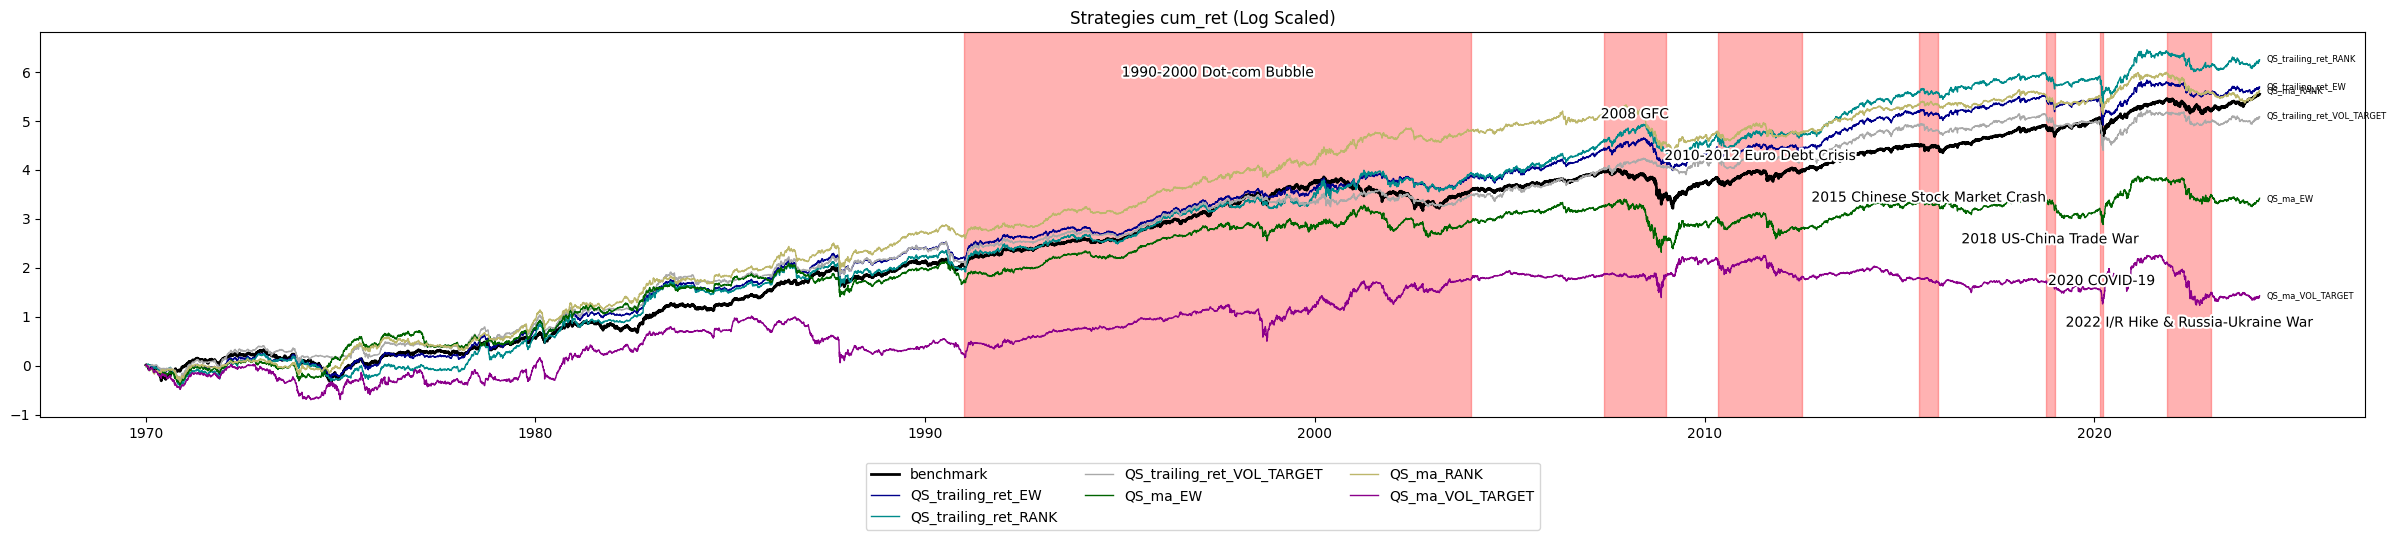

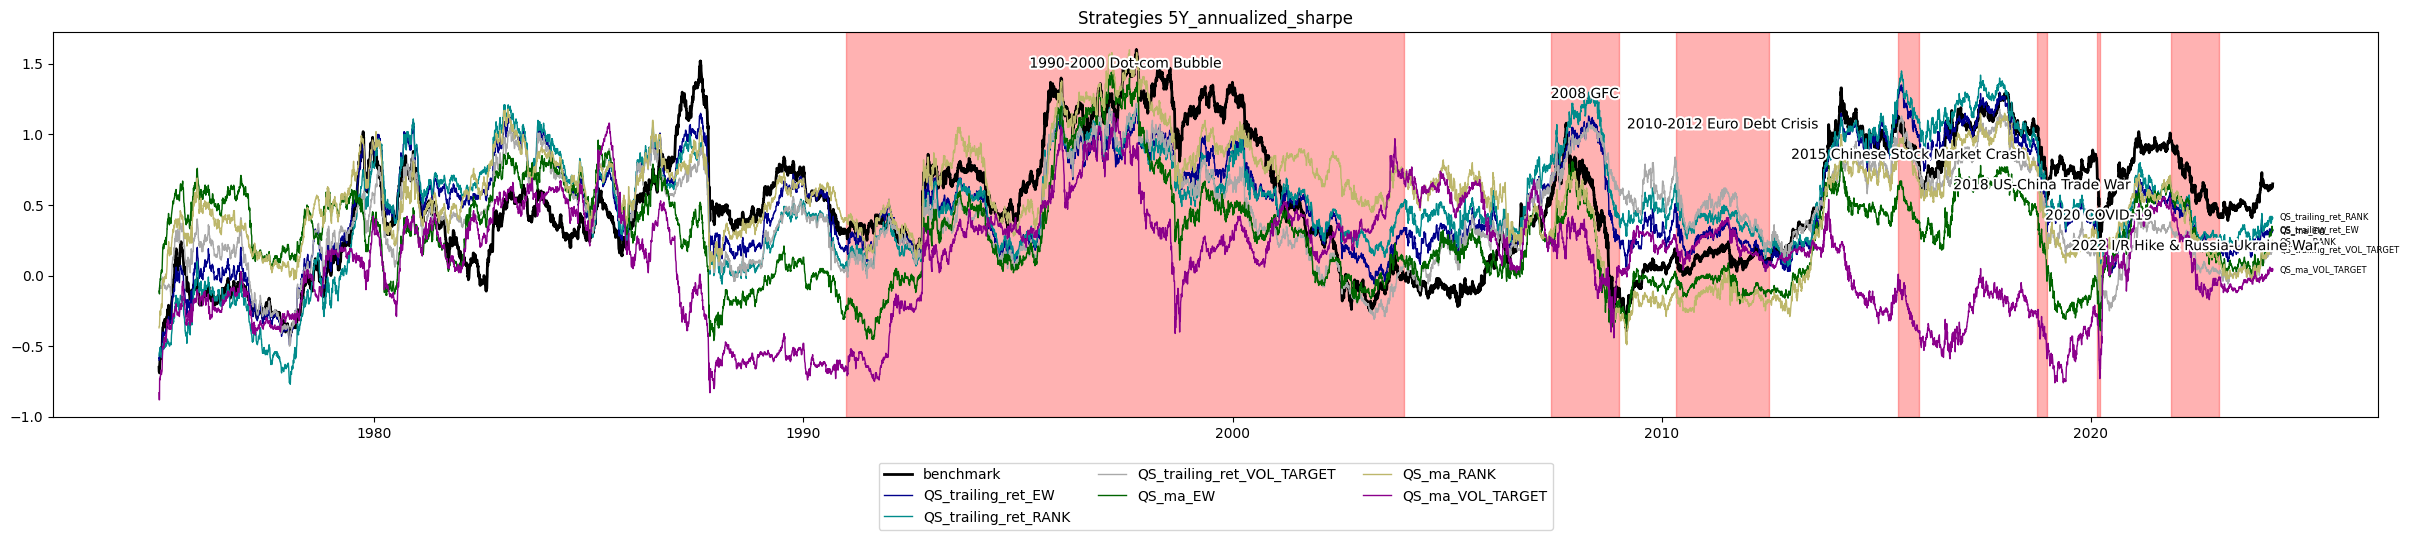

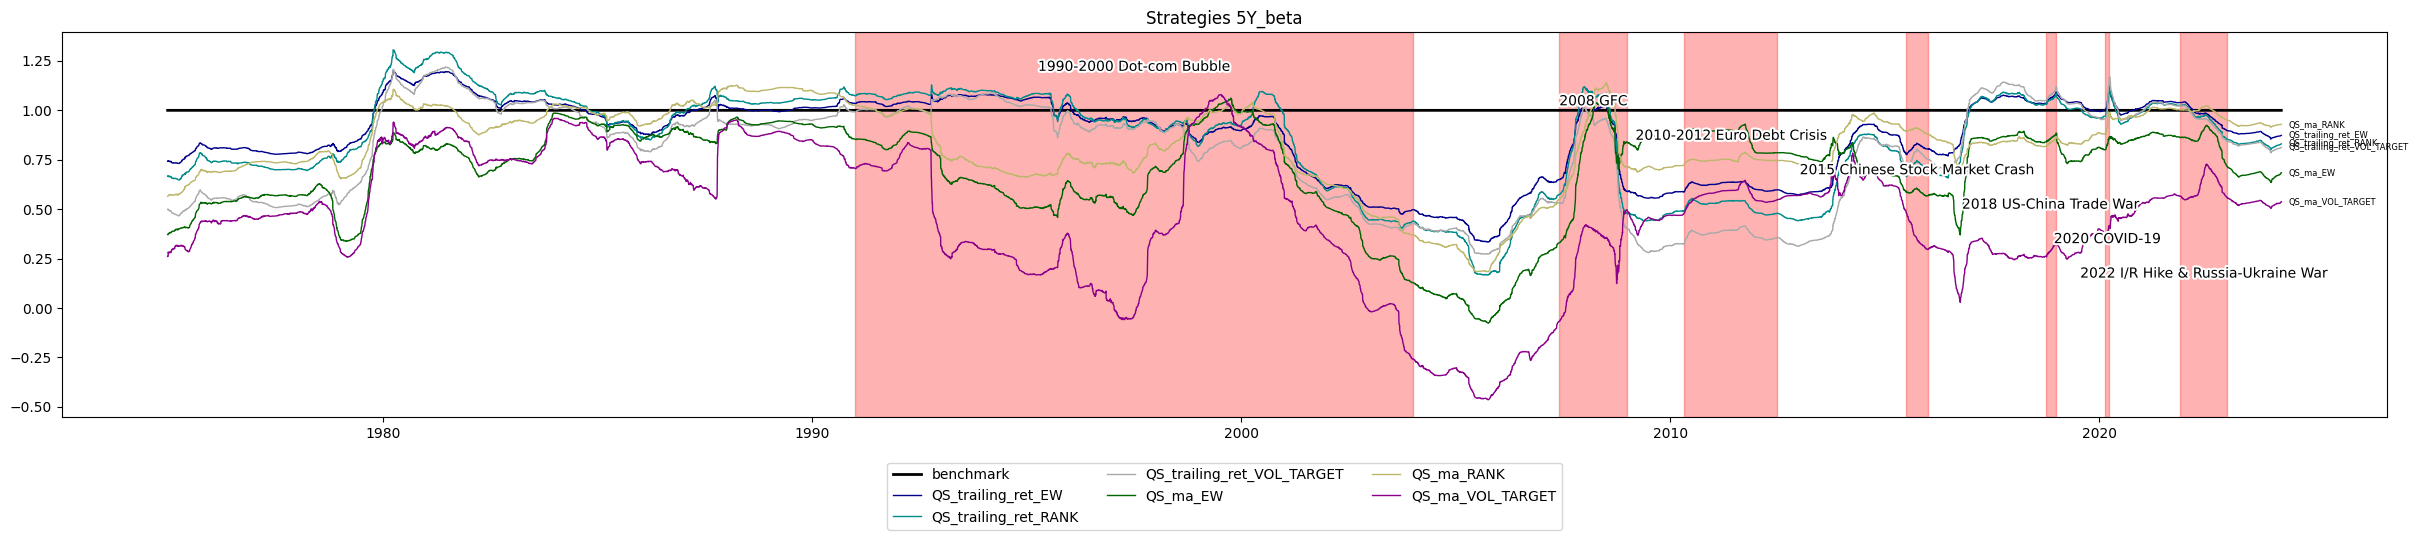

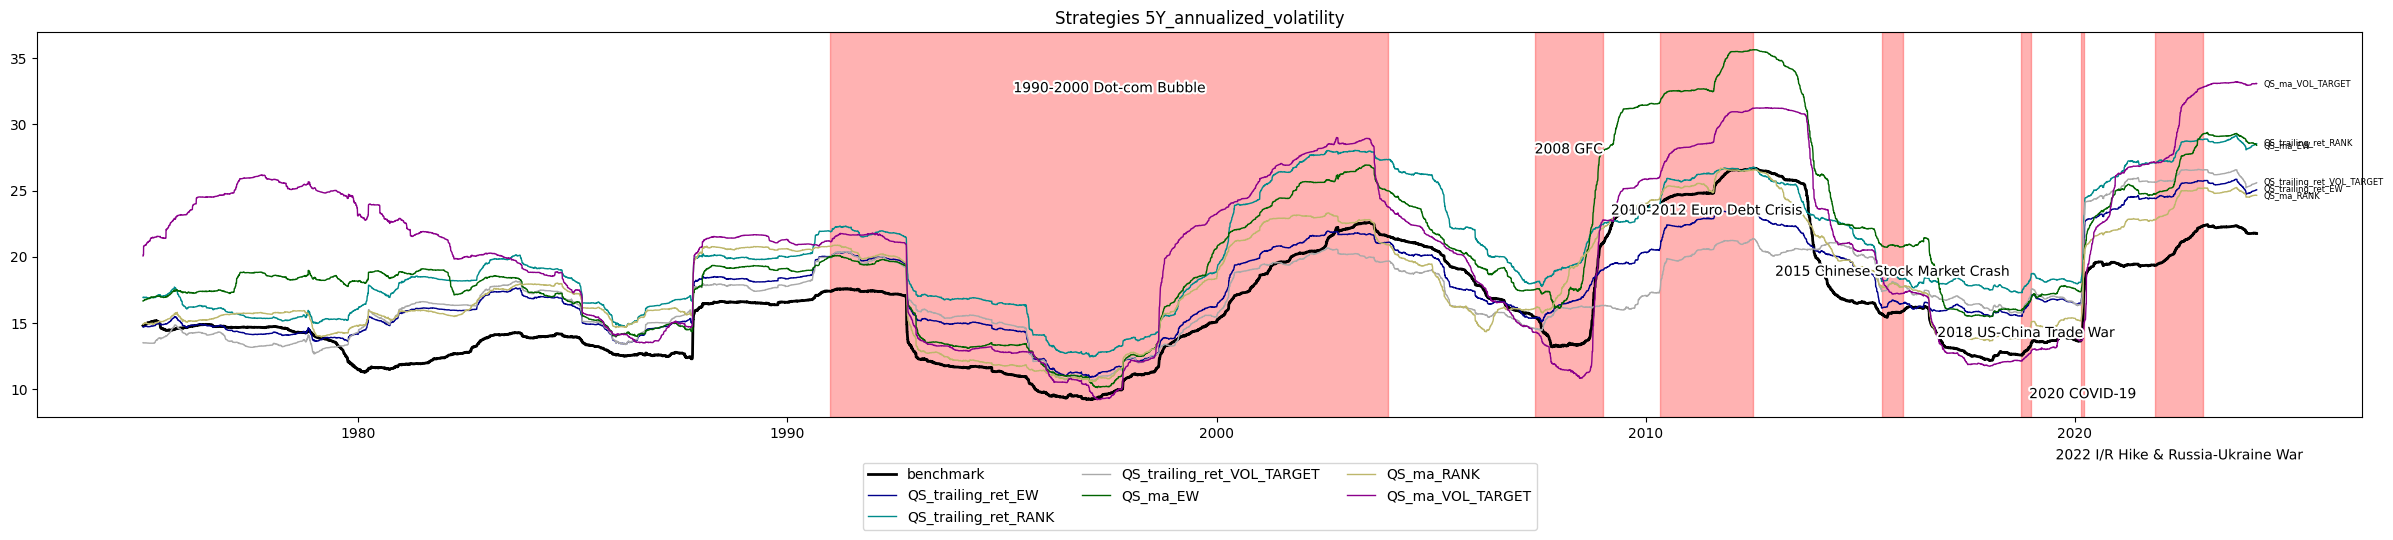

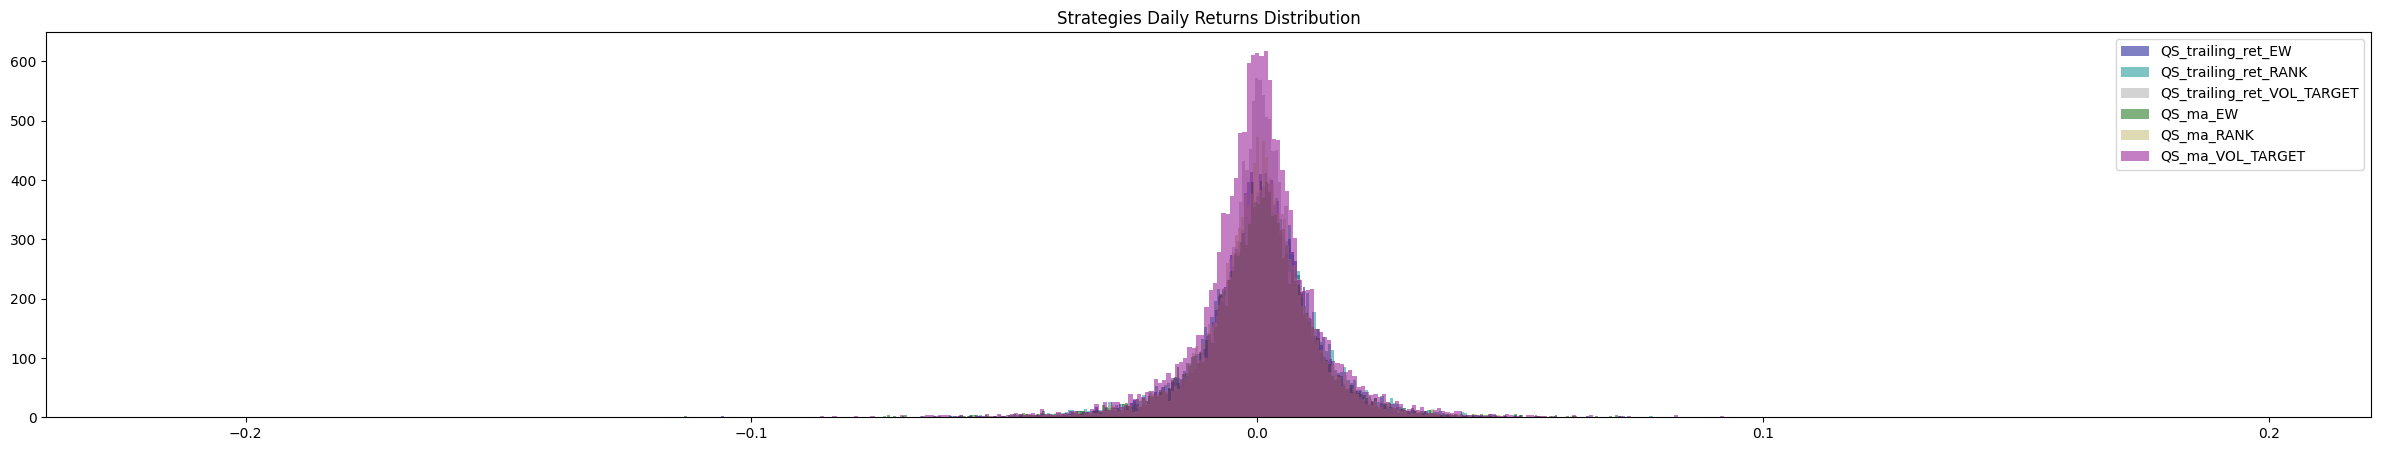

In [10]:
# ['MS_trailing_ret_EW', 'MS_trailing_ret_RANK', 'MS_trailing_ret_VOL_TARGET', 'MS_ma_EW', 'MS_ma_VOL_TARGET']
comp_all = compare(['QS_trailing_ret_EW', 'QS_trailing_ret_RANK', 'QS_trailing_ret_VOL_TARGET', 'QS_ma_EW', 'QS_ma_RANK', 'QS_ma_VOL_TARGET'], 'opt', exclude = True)
for metric in metrics:
    comp_all.compare_chart(metric)
comp_all.compare_ret()

## Weighting Scheme Analysis

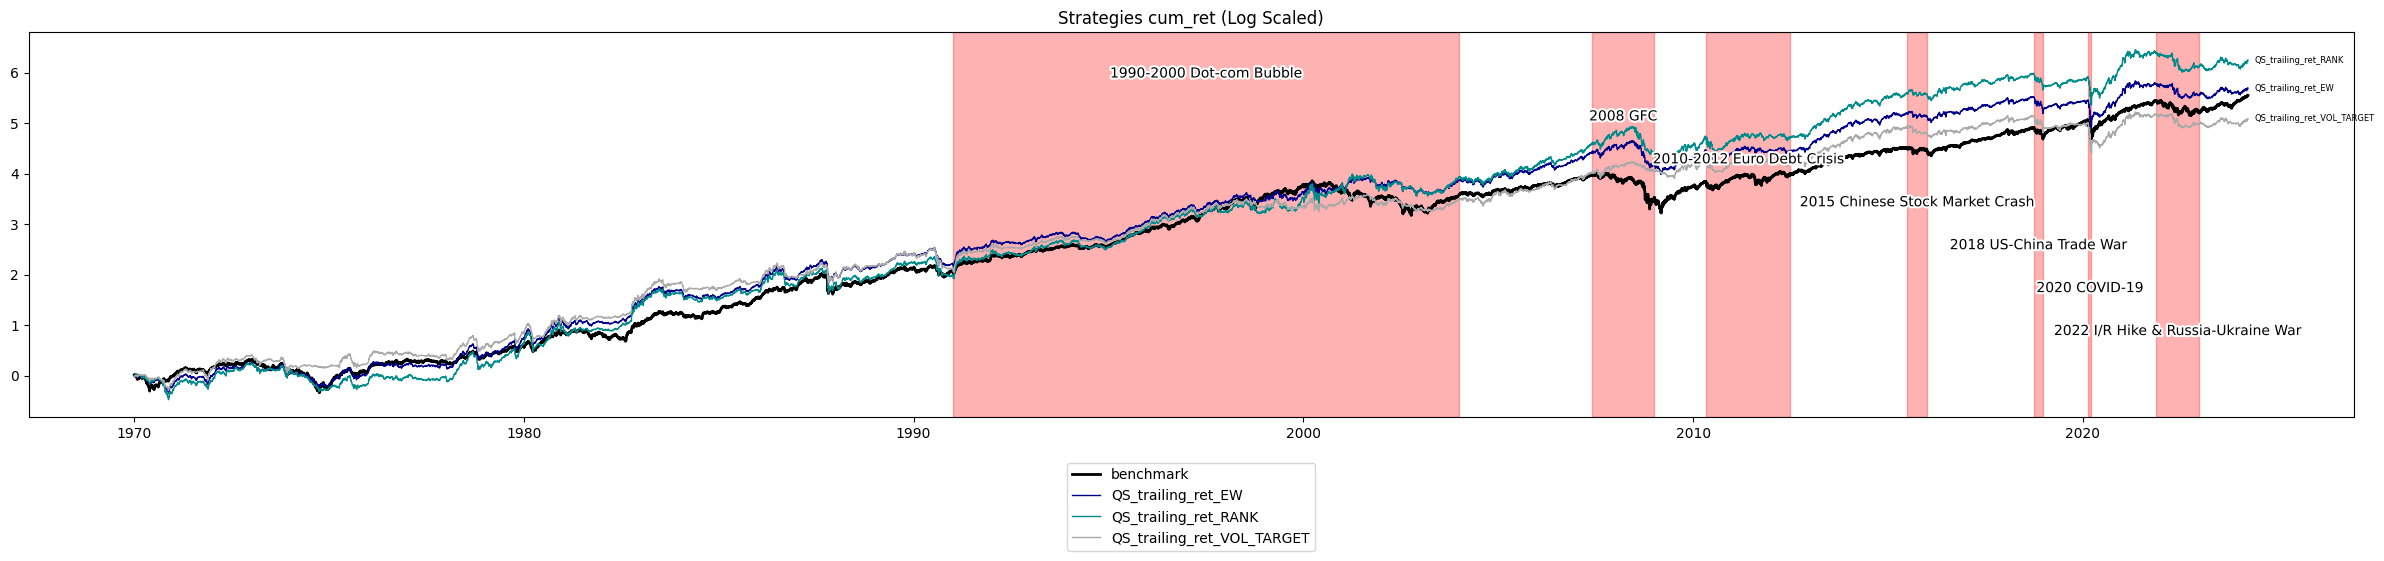

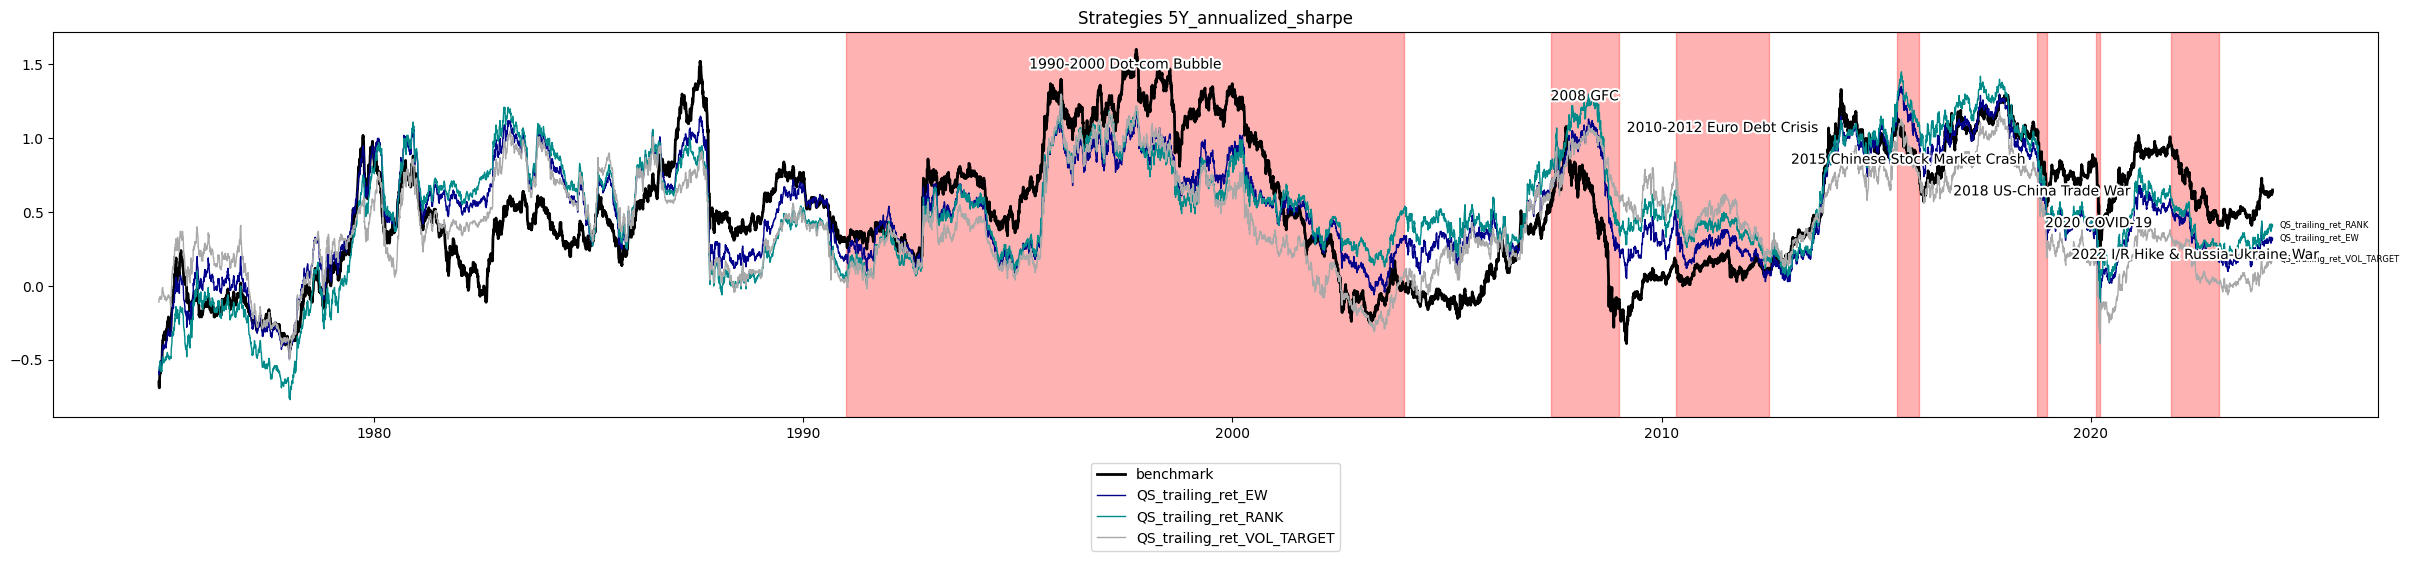

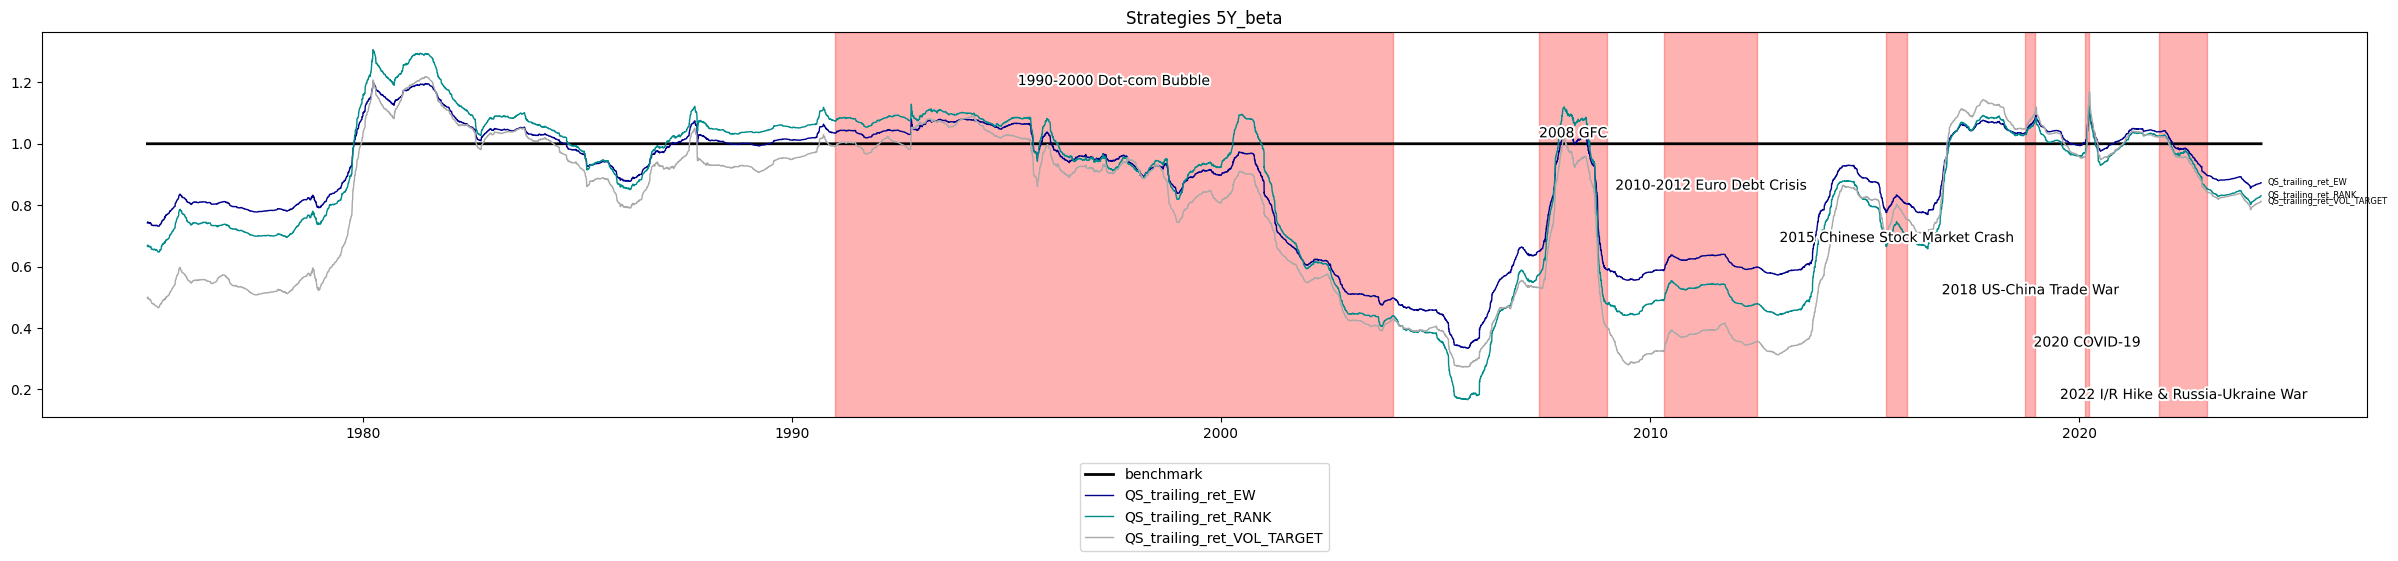

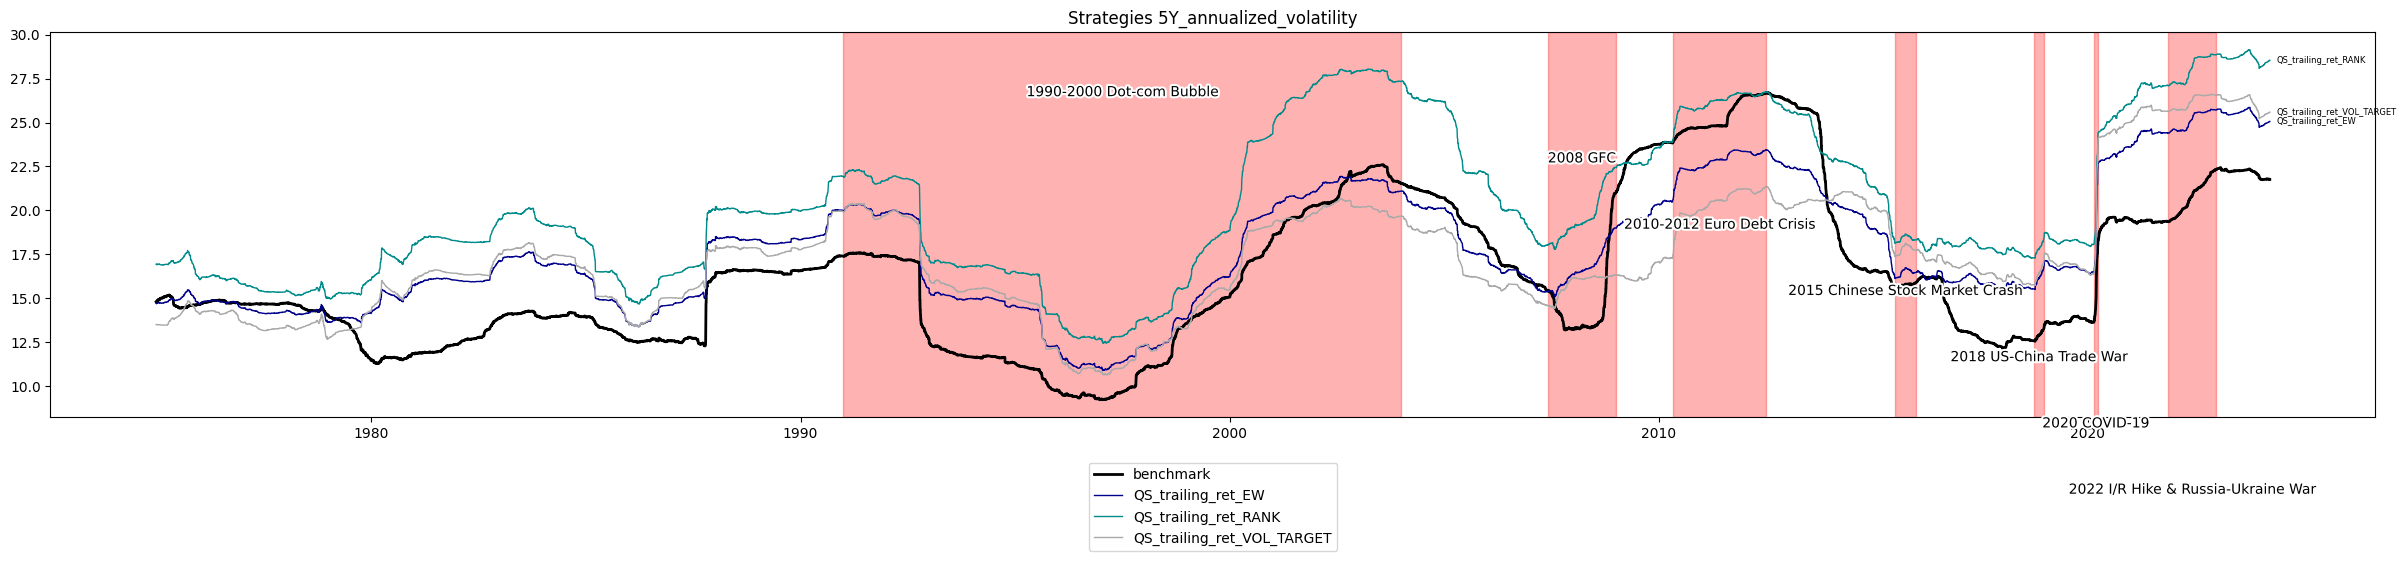

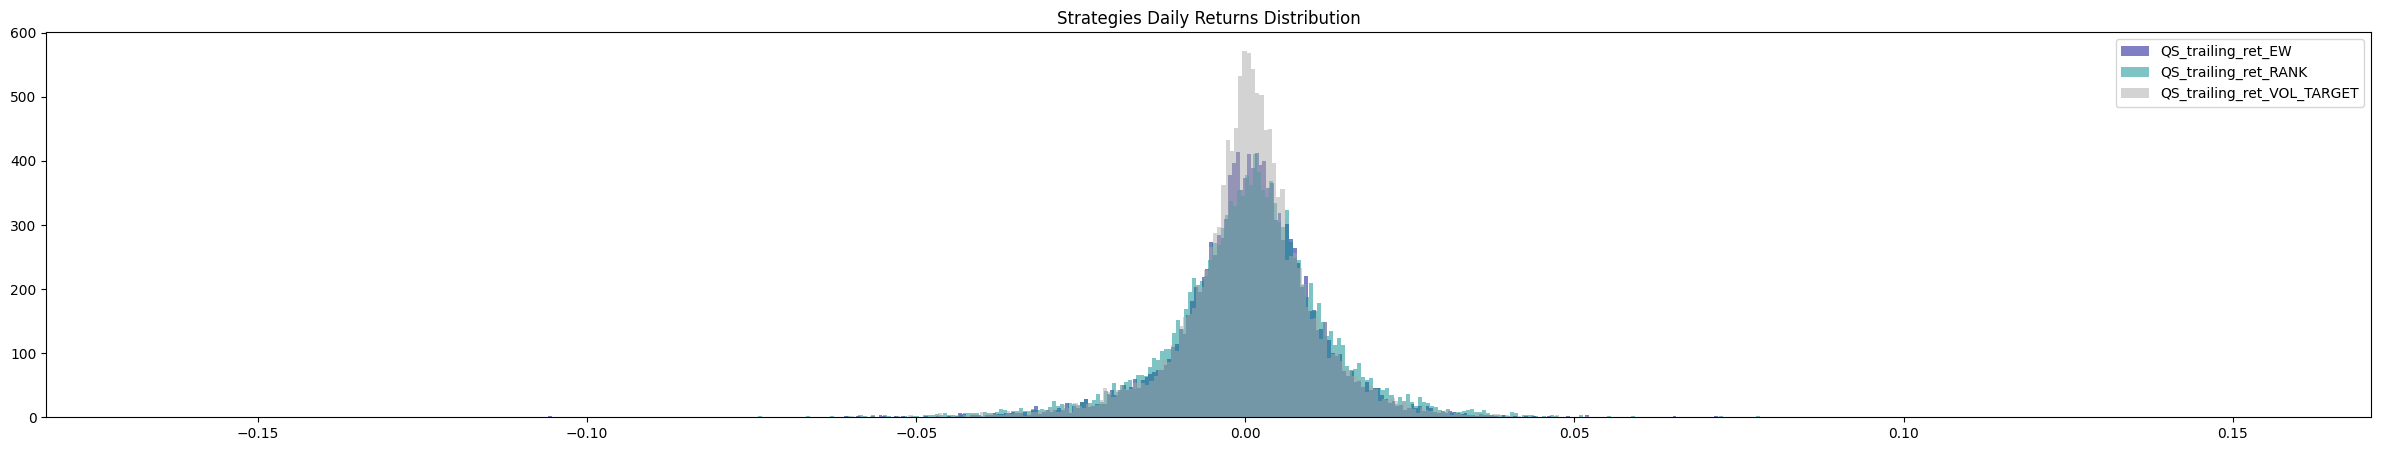

In [11]:
weighting_scheme_compare = ['QS_trailing_ret_EW', 'QS_trailing_ret_RANK', 'QS_trailing_ret_VOL_TARGET']
comp_all = compare(weighting_scheme_compare, 'opt', exclude = True)
for metric in metrics:
    comp_all.compare_chart(metric)
comp_all.compare_ret()

In [12]:
for i in weighting_scheme_compare:
    ret = eval(i).master['portfolio_ret']
    print(f'{i}, skew = {round(skew(ret), 2)}, kurtosis = {round(kurtosis(ret), 2)}')

QS_trailing_ret_EW, skew = -0.71, kurtosis = 12.04
QS_trailing_ret_RANK, skew = -0.64, kurtosis = 10.12
QS_trailing_ret_VOL_TARGET, skew = -0.68, kurtosis = 16.72


# Filtering for best strategy
we look at the top 3 strategies with the highest average T5Y sharpe \
and compared their max drawdown + information ratio

In [13]:
strategy_avg_sharpe = {
    'strategy' : [],
    'T5Y_avg_sharpe': [],
    'max_dd': [],
    'T5Y_avg_IR': []
}
for i in strats:
    strategy_avg_sharpe['strategy'].append(i)
    strategy_avg_sharpe['T5Y_avg_sharpe'].append(np.nanmean(eval(i).master['portfolio_5Y_annualized_sharpe']))
    strategy_avg_sharpe['max_dd'].append(eval(i).master['portfolio_drawdown'].min())
    strategy_avg_sharpe['T5Y_avg_IR'].append(np.nanmean(eval(i).master['portfolio_5Y_annualized_information_ratio']))

pd.DataFrame.from_dict(strategy_avg_sharpe).sort_values(by = 'T5Y_avg_sharpe', ascending = False)

,strategy,T5Y_avg_sharpe,max_dd,T5Y_avg_IR
21,opt_QS_ma_RANK,0.670107,-0.469972,0.401011
19,opt_QS_ma_EW,0.609160,-0.421966,0.266463
13,opt_QS_trailing_ret_EW,0.561754,-0.467380,0.205860
15,opt_QS_trailing_ret_RANK,0.549329,-0.666646,0.197734
23,opt_QS_ma_VOL_TARGET,0.540535,-0.499465,0.085960
20,QS_ma_RANK,0.535953,-0.646395,0.089510
3,opt_MS_trailing_ret_RANK,0.520442,-0.424569,0.144062
14,QS_trailing_ret_RANK,0.518224,-0.485324,0.148767
5,opt_MS_trailing_ret_VOL_TARGET,0.509687,-0.403711,0.007558
12,QS_trailing_ret_EW,0.504389,-0.484994,0.080874


# Best Strategy opt_QS_ma_RANK analysis

### Period Return Distribution

,ret_plus_1,benchmark_ret_plus_1,benchmark_ret_T2y
quarter,,,
1987-10-01,-0.292366,-0.232423,0.171655
2011-07-01,-0.275846,-0.151823,0.159184
1986-07-01,-0.251803,-0.079394,0.090361
2018-10-01,-0.246347,-0.145654,0.046539
2008-07-01,-0.214419,-0.082293,0.043895
2008-10-01,-0.208613,-0.221260,0.071694
1998-07-01,-0.203908,-0.119313,0.028149
2002-07-01,-0.191918,-0.168807,0.001171
1981-07-01,-0.186651,-0.116881,0.079269


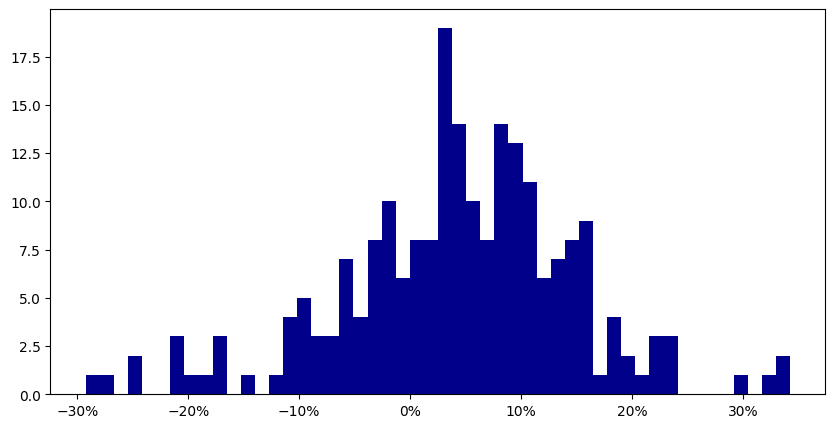

In [14]:
period_ret = opt_QS_ma_RANK.master.copy()
period_ret['year'] = pd.PeriodIndex(period_ret['Date'], freq = 'Y').astype('datetime64[ns]')
period_ret['month'] = pd.PeriodIndex(period_ret['Date'], freq = 'M').astype('datetime64[ns]')
period_ret['quarter'] = pd.PeriodIndex(period_ret['Date'], freq = 'Q').astype('datetime64[ns]')
period_ret['ret_plus_1'] = period_ret['portfolio_ret'] + 1
period_ret['benchmark_ret_plus_1'] = period_ret['benchmark_ret'] + 1
rets = period_ret[['quarter', 'ret_plus_1', 'benchmark_ret_plus_1']].groupby('quarter').prod()-1
rets['benchmark_ret_T2y'] = rets['benchmark_ret_plus_1'].shift(8) # prev 2 years
plt.figure(figsize = (10,5))
plt.hist(rets['ret_plus_1'] *100, bins = 50)
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter());
display(rets.sort_values(by = 'ret_plus_1').head(40))

### Average Period Returns 

In [15]:
mthly_ret = period_ret[['Date','portfolio_ret']].copy()
mthly_ret['portfolio_ret'] = mthly_ret['portfolio_ret'] + 1
mthly_ret['Date'] = pd.PeriodIndex(mthly_ret['Date'], freq = 'Q').astype('datetime64[ns]')
mthly_ret = mthly_ret.groupby('Date').prod()-1
mthly_ret['month-year'] = pd.to_datetime(mthly_ret.index).strftime('%m')
mthly_ret.groupby('month-year').agg({'portfolio_ret' : 'mean'}).sort_index()

,portfolio_ret
month-year,
01,0.046645
04,0.048590
07,0.012452
10,0.063186


In [16]:
mthly_ret = period_ret[['Date','portfolio_ret']].copy()
mthly_ret['portfolio_ret'] = mthly_ret['portfolio_ret'] + 1
mthly_ret['Date'] = pd.PeriodIndex(mthly_ret['Date'], freq = 'M').astype('datetime64[ns]')
mthly_ret = mthly_ret.groupby('Date').prod()-1
mthly_ret['month-year'] = pd.to_datetime(mthly_ret.index).strftime('%m')
mthly_ret.groupby('month-year').agg({'portfolio_ret' : 'mean'}).sort_index()

,portfolio_ret
month-year,
01,0.008895
02,0.018219
03,0.019781
04,0.012867
05,0.014913
06,0.019514
07,0.010212
08,0.006471
09,-0.006185


In [17]:
mthly_ret = period_ret[['Date','portfolio_ret']].copy()
mthly_ret['portfolio_ret'] = mthly_ret['portfolio_ret'] + 1
mthly_ret['Date'] = pd.PeriodIndex(mthly_ret['Date'], freq = 'Y').astype('datetime64[ns]')
mthly_ret = mthly_ret.groupby('Date').prod()-1
mthly_ret['month-year'] = pd.to_datetime(mthly_ret.index).strftime('%Y')
mthly_ret.groupby('month-year').agg({'portfolio_ret' : 'mean'}).sort_index()

,portfolio_ret
month-year,
1970,0.108218
1971,0.078664
1972,0.215413
1973,0.361878
1974,-0.238638
1975,0.323498
1976,0.216960
1977,0.157797
1978,0.183308


### Portfolio contribution to strategy returns

In [18]:
#ind qtd
ind_ret = spot_ret.copy() + 1
ind_ret['DATE'] = ind_ret.index
ind_ret['DATE'] = pd.PeriodIndex(ind_ret['DATE'], freq = 'Q').astype('datetime64[ns]')
ind_ret = ind_ret.groupby('DATE').prod()-1
ind_ret = ind_ret.loc[ind_ret.index >= '1970-01-01 00:00:00']

# weights
weights_df = pd.DataFrame.from_dict(opt_QS_ma_EW.weights).T
weights_df.columns = spot.columns.tolist() + ['RF']

# multiply and shift index
weighted_ret = ind_ret * weights_df.values

# total returns contribution
ret_contri = period_ret.copy()[['Date','portfolio_ret']]
ret_contri['Date'] = pd.PeriodIndex(ret_contri['Date'], freq = 'Q').astype('datetime64[ns]')
ret_contri['portfolio_ret'] += 1
ret_contri = ret_contri.groupby('Date').prod() # this is qtd portfolio rtns
ret_contri = ret_contri.cumprod(axis = 0) # qtd tsv

ret_contri = ret_contri.shift(1).fillna(1)
ret_contri = weighted_ret.mul(ret_contri.values, axis = 0)
ret_contri = ret_contri.sum()
ret_contri = (ret_contri/ret_contri.sum()).sort_values(ascending = False).round(4).to_frame()

top_ret_contri = pd.concat([ret_contri.head(5), ret_contri.tail(5)]).rename(columns = {0: 'return_contribution'})
top_ret_contri

,return_contribution
value_wgted_Coal,0.0936
value_wgted_Chips,0.0853
value_wgted_Autos,0.0789
value_wgted_Softw,0.0676
value_wgted_Toys,0.0572
value_wgted_Other,-0.0101
CMA,-0.0105
value_wgted_Guns,-0.0109
value_wgted_Ships,-0.0158
HML,-0.0248


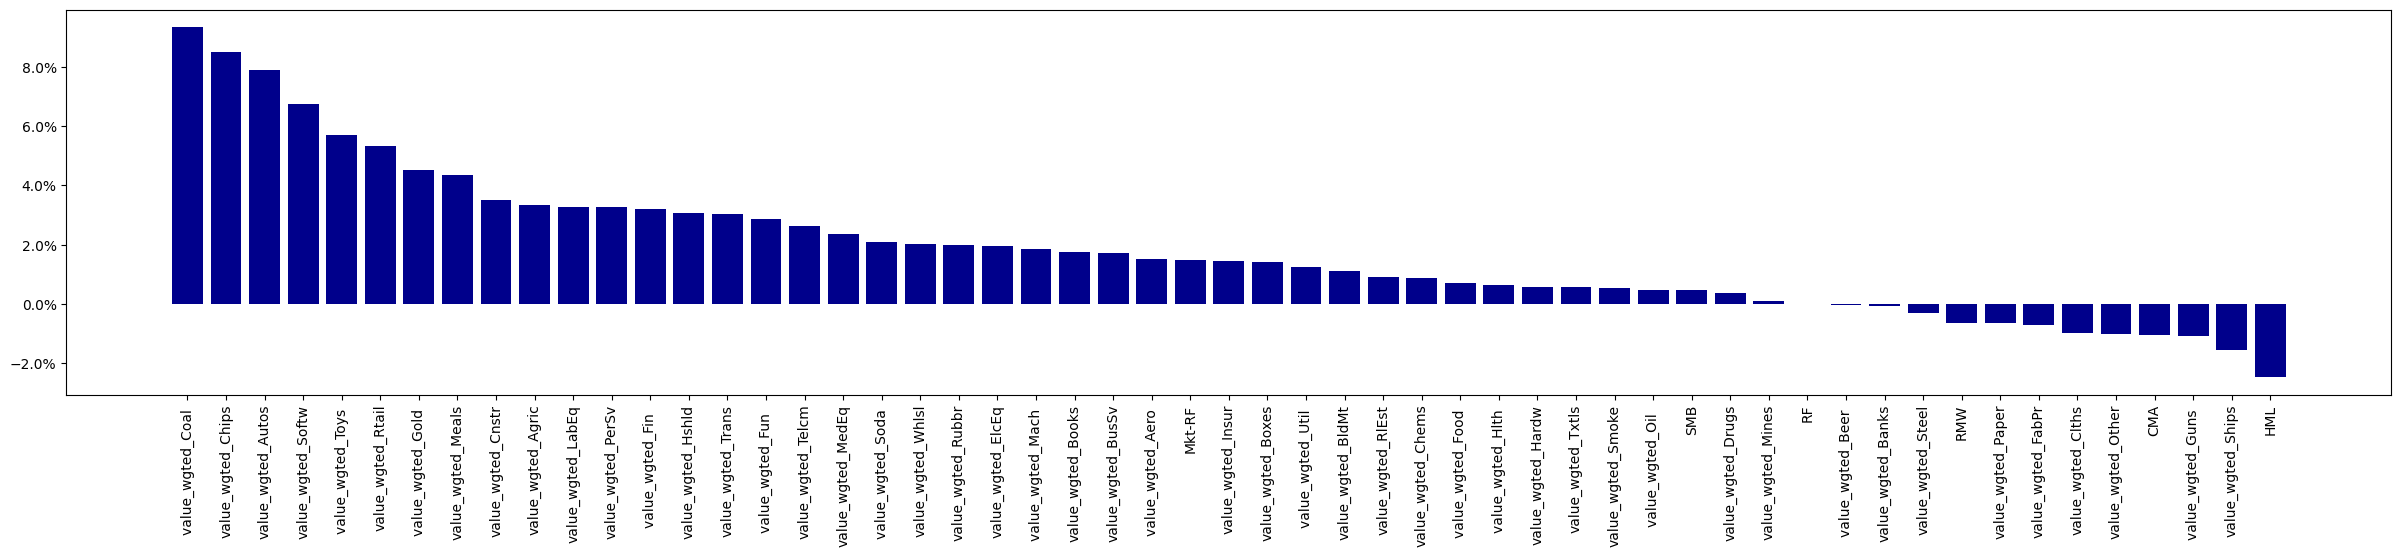

In [19]:
plt.bar(ret_contri.index, ret_contri[0].values *100)
plt.xticks(rotation = 90)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter());

In [ ]:
top = ['value_wgted_Coal ']
bot = ['HML']

mthly_ret = spot_ret[top + bot].copy().reset_index()
for i in top + bot:
    mthly_ret[i] = mthly_ret[i] + 1
mthly_ret['Date'] = pd.PeriodIndex(mthly_ret['Date'], freq = 'Q').astype('datetime64[ns]')
mthly_ret = mthly_ret.groupby('Date').prod()-1
for i in top:
    plt.plot(mthly_ret[i], color = 'g', label = i)
for i in bot:
    plt.plot(mthly_ret[i], color = 'r', label = i)
plt.title('Quarter Returns')
plt.legend();

# Sensitivity

In [7]:
from itertools import combinations

In [8]:
start_date = '1970-01-01' #'1969-07-01'
end_date = '2024-03-01'
rebal_freq = 'QS'
slippage = 0.005
leverage = 1
max_short_weight = 1
downside_risk = 0
benchmark_weights = np.array([1])
metrics = ['Annualized Return', 'Sharpe Ratio', 'Information Ratio', 'Sortino Ratio', 'Max Drawdown', 'Volatility']

params = {
    'start_date': start_date, 
    'end_date': end_date, 
    'rebal_freq': rebal_freq,
    'spot' : spot, 
    'spot_ret': spot_ret, 
    'benchmark_ret': benchmark_ret, 
    'weights': {}, 
    'benchmark_weights': benchmark_weights, 
    'slippage': slippage, 
    'leverage': leverage, 
    'max_short_weight': max_short_weight,
    'downside_risk': downside_risk,
    'metrics': metrics,
    'charts': False
          }

def optimize_ma_strat(base_params: dict, strat: Callable, tf: int, weighting: str, vol_target: float = 0) -> tuple[dict, float, list[int, int]]:
    '''
    optimizes mean portfolio sharpe for a given trailing timeframe
    '''
    best_sharpe = 0
    best_params = None
    params = [i for i in range(5, 205, 5)]
    store = {
        'MA1': [],
        'MA2': [],
        'sharpe': []
    }
    for ma1, ma2 in combinations(params, 2):
        print(ma1, ma2)
        # Generate weights based on strategy
        generated_weights = strat(ma1, ma2, weighting, vol_target = vol_target)
        # Update parameters
        base_params['weights'] = generated_weights
        # Run Backtest
        port = copy.deepcopy(backtest(**base_params))
        port.rebalancing()
        compute_port_perf = performance(port.master['portfolio_ret'], spot_ret[spot_ret.index >= base_params['start_date']]['RF'].values, tf)
        func = np.nanmean(compute_port_perf.compute_rolling_sharpe())
        print(func)
        store['MA1'].append(ma1)
        store['MA2'].append(ma2)
        store['sharpe'].append(func)
        if func > best_sharpe:
            best_sharpe = func
            best_params = [ma1,ma2]
    return store, best_sharpe, best_params

def optimize_lookback_strat(base_params: dict, strat: Callable, tf: int, weighting: str, vol_target: float = 0) -> tuple[dict, float, int]:
    '''
    optimizes mean portfolio sharpe for a given trailing timeframe
    '''
    best_sharpe = 0
    best_params = None
    # params = [5, 21, 21*4, 6*21]
    params = [i for i in range(5, 205, 5)]
    store = {
        'lookback': [],
        'sharpe': []
    }
    for i in params:
        print(i)
        # Generate weights based on strategy
        generated_weights = strat(-i, weighting = weighting, vol_target = vol_target)
        # Update parameters
        base_params['weights'] = generated_weights
        # Run Backtest
        port = copy.deepcopy(backtest(**base_params))
        port.rebalancing()
        compute_port_perf = performance(port.master['portfolio_ret'], spot_ret[spot_ret.index >= base_params['start_date']]['RF'].values, tf)
        func = np.nanmean(compute_port_perf.compute_rolling_sharpe())
        print(func)
        store['lookback'].append(i)
        store['sharpe'].append(func)
        if func > best_sharpe:
            best_sharpe = func
            best_params = i
    return store, best_sharpe, best_params

## Sensitivty MA

In [9]:
optimize_ma = strategy(**params)
optimize_ma = optimize_ma.moving_avg_crossover
weighting = 'RANKED'
store, sharpe, best_params = optimize_ma_strat(params, optimize_ma, 5, weighting, vol_target = 0)

5 10
0.2948836647612913
5 15
0.40259238386603335
5 20
0.4643764592222849
5 25
0.5415457692617341
5 30
0.5675058368891394
5 35
0.5792118186941471
5 40
0.5770525722566622
5 45
0.577283632557765
5 50
0.5701561871024877
5 55
0.5494034296755494
5 60
0.5399702117381853
5 65
0.517294098703808
5 70
0.5128467917236937
5 75
0.5153304886885114
5 80
0.5207173335480235
5 85
0.5243056114644553
5 90
0.5213090733435312
5 95
0.5256340069237582
5 100
0.5262490942758231
5 105
0.5236945495531761
5 110
0.5239642540858225
5 115
0.5223428065373159
5 120
0.5274929554786248
5 125
0.5327356895580067
5 130
0.5411949838187702
5 135
0.5418074433656958
5 140
0.5496699029126214
5 145
0.5551885113268608
5 150
0.5571666666666667
5 155
0.5589587378640777
5 160
0.5665760517799352
5 165
0.5726650485436894
5 170
0.5798333333333333
5 175
0.5874215210355986
5 180
0.5940145631067961
5 185
0.6018309061488674
5 190
0.6068141520943473
5 195
0.6100634404229361
5 200
0.6159715331435542
10 15
0.47170356654053625
10 20
0.5622695435

In [10]:
pd.set_option('display.max_columns', 500)
pd.DataFrame.from_dict(store).set_index('MA1').pivot(columns = 'MA2')

sharpe                                                              \
MA2       10        15        20        25        30        35        40    
MA1                                                                         
5    0.294884  0.402592  0.464376  0.541546  0.567506  0.579212  0.577053   
10        NaN  0.471704  0.562270  0.604459  0.616684  0.611983  0.599401   
15        NaN       NaN  0.559705  0.586367  0.603334  0.593916  0.587306   
20        NaN       NaN       NaN  0.565493  0.578495  0.548018  0.532927   
25        NaN       NaN       NaN       NaN  0.532798  0.507472  0.488020   
30        NaN       NaN       NaN       NaN       NaN  0.505734  0.502948   
35        NaN       NaN       NaN       NaN       NaN       NaN  0.488128   
40        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
45        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
50        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
55        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
60        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
65        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
70        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
75        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
80        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
85        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
90        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
95        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
100       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
105       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
110       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
115       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
120       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
125       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
130       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
135       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
140       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
145       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
150       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
155       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
160       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
165       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
170       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
175       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
180       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
185       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
190       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
195       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

                                                                           \
MA2       45        50        55        60        65        70        75    
MA1                                                                         
5    0.577284  0.570156  0.549403  0.539970  0.517294  0.512847  0.515330   
10   0.586650  0.568556  0.547539  0.531549  0.517921  0.513141  0.501736   
15   0.564917  0.536555  0.524219  0.510981  0.492947  0.481621  0.475482   
20   0.517371  0.498839  0.487190  0.477591  0.471059  0.458594  0.464424   
25   0.469243  0.479836  0.465046  0.448293  0.436272  0.438678  0.446867   
30   0.498092  0.462381  0.433379  0.426089  0.427119  0.437047  0.441012   
35   0.463297  0.434575  0.405989  0.398504  0.405028  0.413262  0.412420   
40

In [11]:
sharpe, best_params 

(0.6701065473769826, [190, 195])

## Sensitivty Lookback

In [20]:
optimize_lookback = strategy(**params)
optimize_lookback = optimize_lookback.trailing_rets
weighting = 'EQUAL'
store, sharpe, best_params = optimize_lookback_strat(params, optimize_lookback, 5, weighting)

10
0.3725464938410756
15
0.3307430963690524
20
0.4260888817325497
25
0.489642540858224
30
0.47633443362048145
35
0.5320932292085985
40
0.5486047822236534
45
0.5301618227195878
50
0.5330150551485388
55
0.5177272361323565
60
0.5135174301586023
65
0.5389863940101441
70
0.49298607197488126
75
0.4457322276789309
80
0.42573383785524516
85
0.44453667176555833
90
0.4766516383543998
95
0.515123581032123
100
0.4913074631672168
105
0.4642452298526689
110
0.482154415908542
115
0.4724225102648741
120
0.5123685693583447
125
0.4930553095563965
130
0.5186796554222687
135
0.561754287094437
140
0.5330923436116255
145
0.5344263746880283
150
0.4739199742371789
155
0.4798655502777554
160
0.49339264149424367
165
0.5121930601400854
170
0.48648256984139765
175
0.5224563239674744
180
0.5231978101602125
185
0.5297472023186539
190
0.5034409467836728
195
0.4750052330730215
200
0.4777320666612994


In [21]:
pd.DataFrame.from_dict(store)

,lookback,sharpe
0,10,0.372546
1,15,0.330743
2,20,0.426089
3,25,0.489643
4,30,0.476334
5,35,0.532093
6,40,0.548605
7,45,0.530162
8,50,0.533015
9,55,0.517727


In [22]:
sharpe, best_params 

(0.561754287094437, 135)